# Generate Images from Records by plotting and saving Matplotlib figures 

Import modules

In [5]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import wfdb
import os
from wfdb import processing
import numpy as np
import cv2

Download Database 

Plot all Signals

Record 100 is imported and ploted using 'wfdb' tools.

In [6]:
record = wfdb.rdrecord('../dataset/mitdb/100', sampto=3600, channels=[0])
annotation = wfdb.rdann('../dataset/mitdb/100','atr', sampto=3600)
signal, fields = wfdb.rdsamp('../dataset/mitdb/100', sampto=3600, channels=[0])

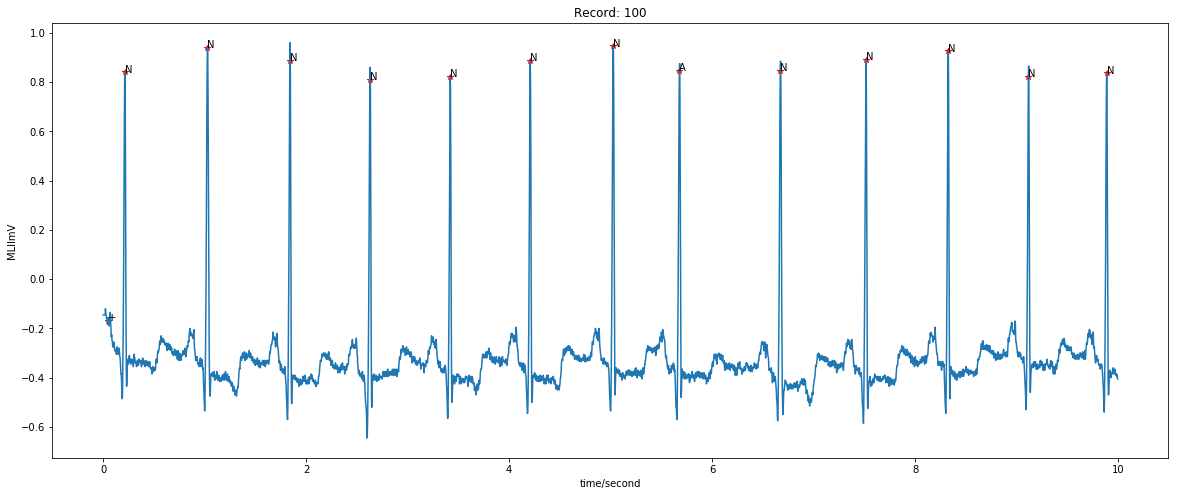

In [3]:
wfdb.plot_wfdb(record=record, annotation=annotation, plot_sym=True, time_units='seconds', figsize=(20,8)) 

The data structure used to store the signal is Numpy Array. 'p_signal' attribute consists the signal data.
The Header file consists of information about the person from whom the signal is extracted.  

In [4]:
record.__dict__

{'record_name': '100',
 'n_sig': 1,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 3600,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII'],
 'p_signal': array([[-0.145],
        [-0.145],
        [-0.145],
        ...,
        [-0.39 ],
        [-0.4  ],
        [-0.405]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100.dat'],
 'fmt': ['212'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [200.0],
 'baseline': [1024],
 'units': ['mV'],
 'adc_res': [11],
 'adc_zero': [1024],
 'init_value': [995],
 'checksum': [48184],
 'block_size': [0]}

In [5]:
signal[:,0]

array([-0.145, -0.145, -0.145, ..., -0.39 , -0.4  , -0.405])

In [6]:
fields

{'fs': 360,
 'sig_len': 3600,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['MLII'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}

QRS segment detection using 'wfdb'. 

In [12]:
rqrs = processing.xqrs_detect(record.p_signal[:,0], record.fs)

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


In [13]:
len(rqrs)

2273

The record number is stored in 'data'. R-T intervals are plotted and stored in 'figure'.

100 - normal

118 - rbbb

217 - paced

In [7]:
recs = ["100", "118", "217"]

In [ ]:
dataset = {}
for rec_no in recs:
    data = "../dataset/mitdb/"+rec_no
    result_to = "../dataset/images/"+rec_no
    record = wfdb.rdrecord(data, channels=[0])
    rqrs = processing.xqrs_detect(record.p_signal[:,0], record.fs)
    figure = []
    for i in range(100):
        start = rqrs[i]
        stop = rqrs[i]+200
        if start<0: 
            start=0
        temp_rec = wfdb.rdrecord(data, sampfrom=start,sampto=stop, channels=[0])
        figure.append(wfdb.plot_wfdb(record=temp_rec, title=rqrs[i], return_fig=True))
#         figure[-1].savefig(result_to + "/" + str(rqrs[i]) + ".png")
#         plt.close()
    dataset[rec_no] = figure

# Convert Matplotlib Figures to Numpy arrays

In [9]:
image = dataset["100"][0]

In [10]:
image.canvas.draw()

In [11]:
data = np.frombuffer(image.canvas.tostring_rgb(), dtype=np.uint8)

In [12]:
data = data.reshape((image.canvas.get_width_height()[::-1] + (3,)))

In [20]:
data.shape

(288, 432, 3)

In [19]:
data = cv2.cvtColor(data, cv2.COLOR_RGB2BGR)

In [121]:
data = data[288-250:288-35, 55:390]

In [122]:
data = cv2.resize(data, (int(215/5), int(215/5)), cv2.INTER_LINEAR)

In [123]:
cv2.imshow('image', data)

In [124]:
cv2.waitKey(0)
cv2.destroyAllWindows()